### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline


### Importing dataset

In [2]:
# Loading the dataset
data = pd.read_csv("food_booking.csv")
data.head(4)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6


## Geting to know our data

In [3]:
data.shape

(74818, 6)

In [4]:
data.describe()

,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [5]:
data.isnull().sum()

Order Number      0
Order Date        0
Item Name         0
Quantity          0
Product Price     0
Total products    0
dtype: int64

In [6]:
data.duplicated().sum()

97

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [8]:
data['Order Date']= pd.to_datetime(data['Order Date'])

In [9]:
# Calculate the total sales for each item
data['Total Sales'] = data['Quantity'] * data['Product Price']

## Converting our order date column so that we can be able to use it.

In [12]:
data['Year'] = data['Order Date'].dt.year 
data['time'] = data['Order Date'].dt.time 
data['Day'] = pd.to_datetime(data['Order Date']).dt.day_name()
data['Month'] = pd.to_datetime(data['Order Date']).dt.month_name()
data


,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Total Sales,Year,time,Day,Month
0,16118,2019-03-08 20:25:00,Plain Papadum,2,0.80,6,1.60,2019,20:25:00,Friday,March
1,16118,2019-03-08 20:25:00,King Prawn Balti,1,12.95,6,12.95,2019,20:25:00,Friday,March
2,16118,2019-03-08 20:25:00,Garlic Naan,1,2.95,6,2.95,2019,20:25:00,Friday,March
3,16118,2019-03-08 20:25:00,Mushroom Rice,1,3.95,6,3.95,2019,20:25:00,Friday,March
4,16118,2019-03-08 20:25:00,Paneer Tikka Masala,1,8.95,6,8.95,2019,20:25:00,Friday,March
...,...,...,...,...,...,...,...,...,...,...,...
74813,2518,2016-05-18 18:53:00,House Red wine 75cl,2,17.95,7,35.90,2016,18:53:00,Wednesday,May
74814,2503,2016-05-14 19:28:00,House Red wine 75cl,2,17.95,6,35.90,2016,19:28:00,Saturday,May
74815,2467,2016-10-05 13:18:00,House Red wine 75cl,2,17.95,9,35.90,2016,13:18:00,Wednesday,October
74816,2249,2016-07-04 19:04:00,House white wine 75cl,1,17.95,6,17.95,2016,19:04:00,Monday,July


In [13]:
data['Item Name'].unique().size

248

## The 10 best selling items.

In [14]:
# Find the most frequent items
most_frequent_items = data['Item Name'].value_counts()
data
# Print the result
print("Most frequent items:")
print(most_frequent_items[:10])


Most frequent items:
Pilau Rice              4721
Plain Naan              3753
Plain Papadum           3598
Garlic Naan             2628
Onion Bhajee            2402
Plain Rice              2369
Chicken Tikka Masala    2133
Mango Chutney           2070
Bombay Aloo             1752
Peshwari Naan           1535
Name: Item Name, dtype: int64


## 

## The most bought item

In [15]:
# Group the data by items and sum the quantities
grouped_data = data.groupby('Item Name')['Quantity'].sum()

# Find the most bought item
most_bought_item = grouped_data.idxmax()

# Print the result
print("The most bought item is:", most_bought_item)

The most bought item is: Plain Papadum


## The most selling time and the products that are being sold at that time.

In [17]:
data = pd.DataFrame(data)


# Count the number of sales for each hour
hourly_sales = data['time'].value_counts()

# Find the most selling hour
time = hourly_sales.idxmax()

def convert_to_12_hour(time):
    hour = int(time[:2])

    if hour == 0:
        return "12 am"
    elif 1 <= hour <= 11:
        return f"{hour} am"
    elif hour == 12:
        return "12 pm"
    else:
        return f"{hour - 12} pm"

time = "18:52:00"
formatted_time = convert_to_12_hour(time)

# Print the result
print("The most selling hour is:",formatted_time)
# Print the result
items_bought = data['Item Name'].value_counts()

print("Items bought at that particular time ",'items_bought', ":")
print(items_bought[:10])

The most selling hour is: 6 pm
Items bought at that particular time  items_bought :
Pilau Rice              4721
Plain Naan              3753
Plain Papadum           3598
Garlic Naan             2628
Onion Bhajee            2402
Plain Rice              2369
Chicken Tikka Masala    2133
Mango Chutney           2070
Bombay Aloo             1752
Peshwari Naan           1535
Name: Item Name, dtype: int64


##  Sales by date (Y/M/D)

### By Year

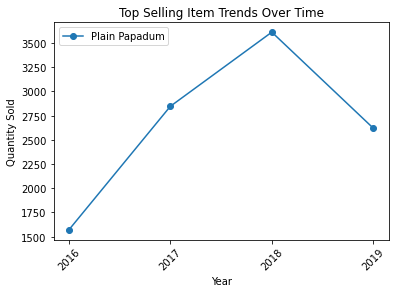

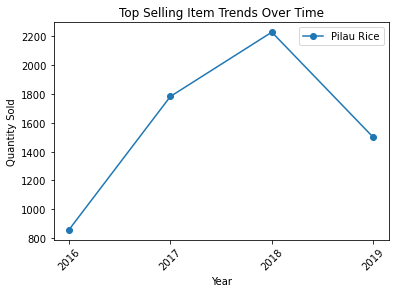

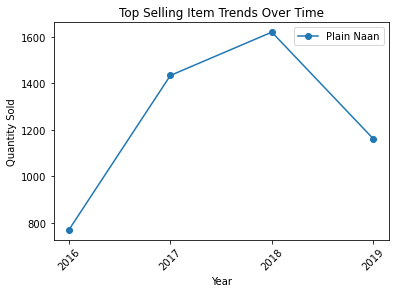

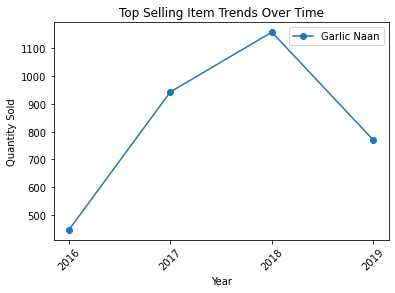

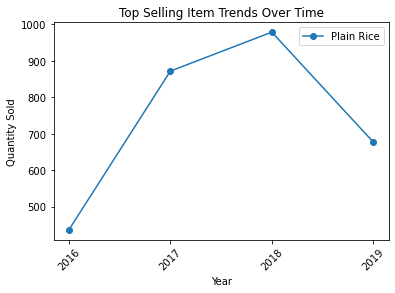

In [19]:
# Group the data by the item and calculate the total quantity sold for each item by year
item_sales = data.groupby('Item Name')['Quantity'].sum()

# Sort the items based on the total quantity sold in descending order
top_items = item_sales.sort_values(ascending=False).index[:5]  # Select the top 5 selling items

# Filter the data for the top-selling items
top_items_data = data[data['Item Name'].isin(top_items)]

# Group the data by the year and month, and calculate the total quantity sold for each item in each period
monthly_item_sales = top_items_data.groupby(['Year', 'Item Name'])['Quantity'].sum()

# Reset the index
monthly_item_sales = monthly_item_sales.reset_index()

# Create a separate graph for each top-selling item by year
for item in top_items:
    item_data = monthly_item_sales[monthly_item_sales['Item Name'] == item]

    # Set the x-axis range and labels
    x = range(len(item_data))
    x_labels = item_data['Year']

    # Plot the line graph for the current item
    plt.plot(x, item_data['Quantity'], marker='o', label=item)
    plt.xlabel('Year')
    plt.ylabel('Quantity Sold')
    plt.title('Top Selling Item Trends Over Time')
    plt.xticks(x, x_labels, rotation=45)

    # Display the legend
    plt.legend()

    # Display the graph for the current item
    plt.show()

### By Month

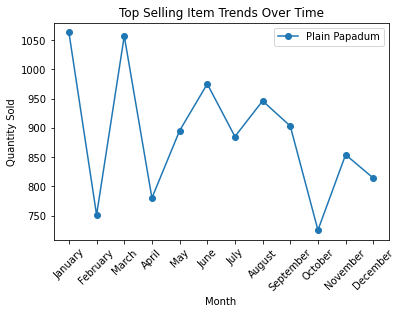

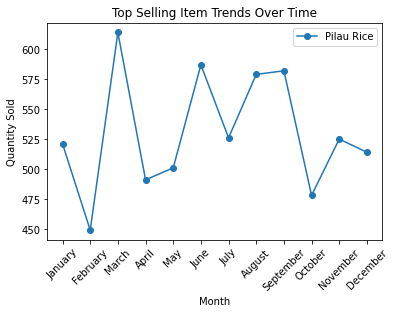

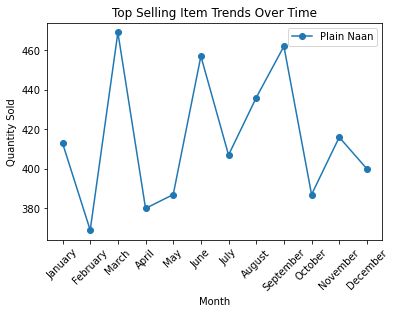

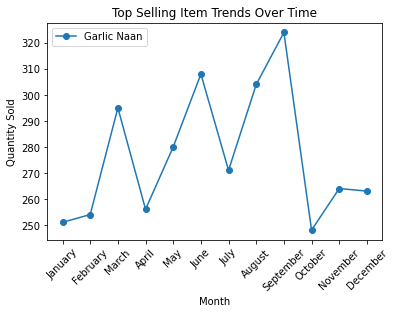

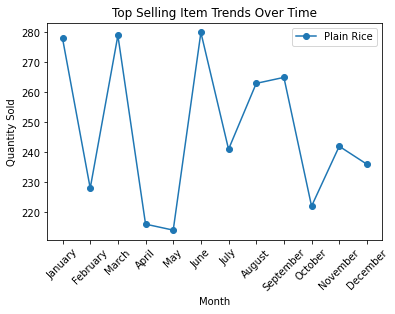

In [20]:
# Group the data by the item and calculate the total quantity sold for each item by month
item_sales = data.groupby('Item Name')['Quantity'].sum()

# Sort the items based on the total quantity sold in descending order
top_items = item_sales.sort_values(ascending=False).index[:5]  # Select the top 5 selling items

# Filter the data for the top-selling items
top_items_data = data[data['Item Name'].isin(top_items)]

# Group the data by the year and month, and calculate the total quantity sold for each item in each period
monthly_item_sales = top_items_data.groupby(['Month', 'Item Name'])['Quantity'].sum()

# Reset the index
monthly_item_sales = monthly_item_sales.reset_index()

# Create a separate graph for each top-selling item
for item in top_items:
    item_data = monthly_item_sales[monthly_item_sales['Item Name'] == item]

    # Set the x-axis range and labels
    x = range(len(item_data))
    x_labels = item_data['Month']
    
      # Sort the DataFrame by month
    data = data.sort_values('Month')

    # Create a list of month names
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Set the x-axis range and labels
    x = range(1, 13)  # Months from January to December
    x_labels = [month_names[i-1] for i in x]
    # Plot the line graph for the current item
    plt.plot(x, item_data['Quantity'], marker='o', label=item)
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.title('Top Selling Item Trends Over Time')
    plt.xticks(x, x_labels, rotation=45)

    # Display the legend
    plt.legend()

    # Display the graph for the current item
    plt.show()

### By Day

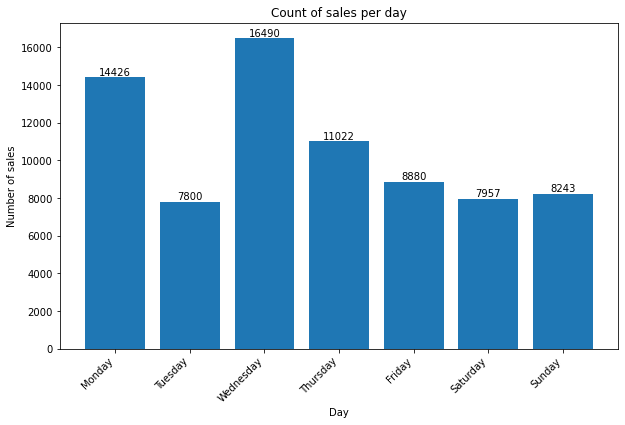

In [21]:
# Count the number of orders for each day
orders_per_day = data['Day'].value_counts().sort_index()

# # Create a list of month names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# # Set the x-axis range and labels
x = range(1, 8)  # Days from Monday to Sunday
x_labels = [day_names[i-1] for i in x]

# # Increase the figure size
plt.figure(figsize=(10, 6))

# # Plot the bar graph
plt.bar(x, orders_per_day, tick_label=x_labels)
plt.xlabel('Day')
plt.ylabel('Number of sales')
plt.title('Count of sales per day')

# # Display the values on top of each bar
for i, v in enumerate(orders_per_day):
    plt.text(i+1, v, str(v), ha='center', va='bottom')

# # Increase the space between x-axis labels
plt.xticks(rotation=45, ha='right')

# # Display the graph
plt.show()

##  10 Items that generated more sales 

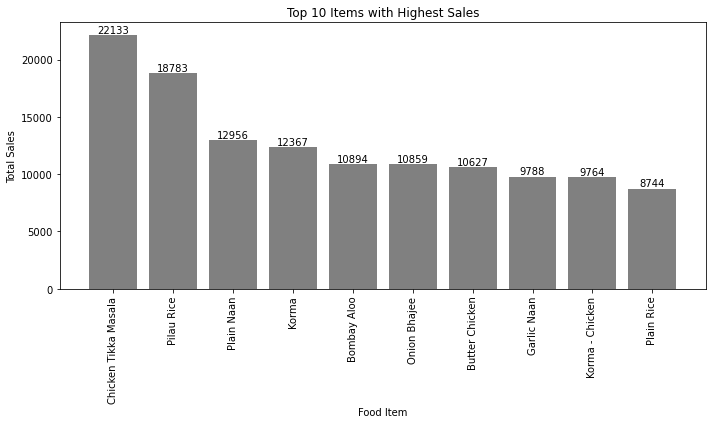

In [22]:
# Group the orders by item_name and calculate the total quantity for each item
order_summary = data.groupby('Item Name')['Total Sales'].sum().reset_index()

# Sort the order_summary DataFrame by order_quantity in descending order
order_summary = order_summary.sort_values('Total Sales', ascending=False)

# Select the top 10 food items with the highest quantity ordered
top_10_items = order_summary.head(10)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['Item Name'], top_10_items['Total Sales'], color='Grey')
plt.xlabel('Food Item')
plt.ylabel('Total Sales')
plt.title('Top 10 Items with Highest Sales')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate each bar with its rounded value
for i, value in enumerate(top_10_items['Total Sales']):
    plt.text(i, value, str(round(value, )), ha='center', va='bottom')

plt.show()


## Items that are generating more sales

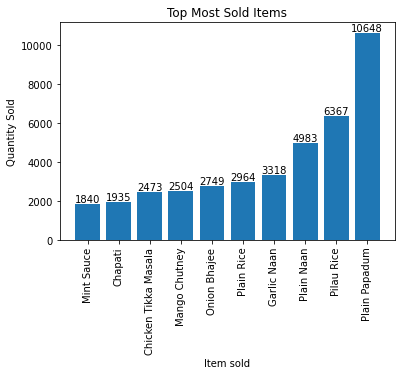

In [23]:
# Group the data by item and calculate the total quantity sold for each item
item_quantity = data.groupby('Item Name')['Quantity'].sum()

# Sort the items based on the quantity sold in ascending order
top_least_sold_items = item_quantity.sort_values().tail(10)  # Select the top 5 least sold items

# Plot a bar graph to visualize the quantity sold for each item
plt.bar(top_least_sold_items.index, top_least_sold_items)
plt.xlabel('Item sold')
plt.ylabel('Quantity Sold')
plt.title('Top Most Sold Items')
plt.xticks(rotation=90)

# Annotate each bar with its value
for i, value in enumerate(top_least_sold_items):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the graph
plt.show()

## Items that are generating least sales

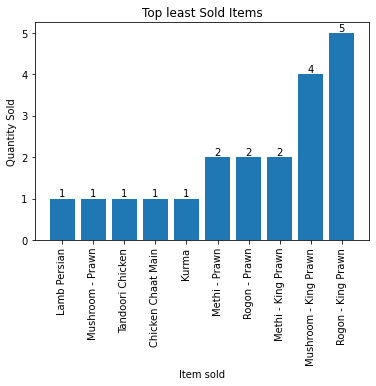

In [24]:
# Group the data by item and calculate the total quantity sold for each item
item_quantity = data.groupby('Item Name')['Quantity'].sum()

# Sort the items based on the quantity sold in ascending order
top_least_sold_items = item_quantity.sort_values().head(10)  # Select the top 5 least sold items

# Plot a bar graph to visualize the quantity sold for each item
plt.bar(top_least_sold_items.index, top_least_sold_items)
plt.xlabel('Item sold')
plt.ylabel('Quantity Sold')
plt.title('Top least Sold Items')
plt.xticks(rotation=90)

# Annotate each bar with its value
for i, value in enumerate(top_least_sold_items):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the graph
plt.show()

## Most expensive item

In [25]:
most = data[data["Product Price"] == data["Product Price"].max()]
most.head(1)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Total Sales,Year,time,Day,Month
74811,2628,2016-04-06 13:38:00,House Red wine 75cl,2,17.95,7,35.9,2016,13:38:00,Wednesday,April


## Least expensive item

In [36]:
most = data[data["Product Price"] == data["Product Price"].min()]
most.head(1)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Total Sales,Year,time,Day,Month,Weekday
933,14630,2019-04-05 18:21:00,Mango Chutney,2,0.5,8,1.0,2019,18:21:00,Friday,April,4


## Trends of the first five items that generated more sales over time

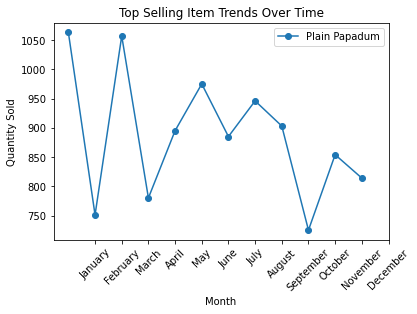

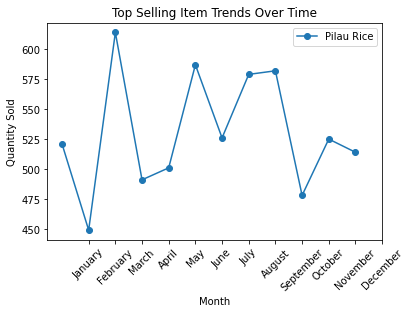

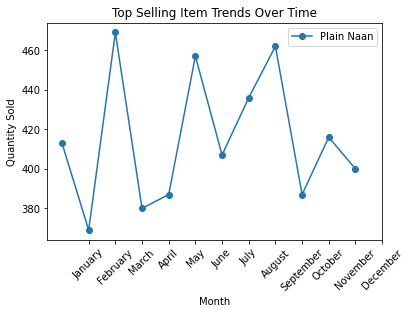

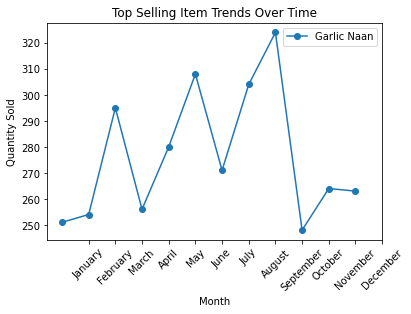

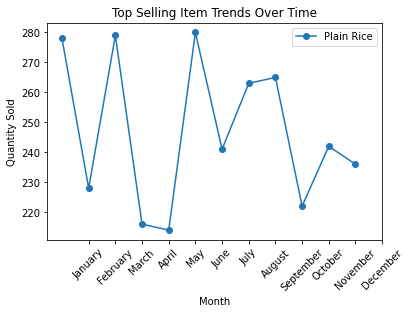

In [26]:
# Group the data by the item and calculate the total quantity sold for each item
item_sales = data.groupby('Item Name')['Quantity'].sum()

# Sort the items based on the total quantity sold in descending order
top_items = item_sales.sort_values(ascending=False).index[:5]  # Select the top 5 selling items

# Filter the data for the top-selling items
top_items_data = data[data['Item Name'].isin(top_items)]

# Group the data by the year and month, and calculate the total quantity sold for each item in each period
monthly_item_sales = top_items_data.groupby(['Month', 'Item Name'])['Quantity'].sum()

# Reset the index
monthly_item_sales = monthly_item_sales.reset_index()

# Create a separate graph for each top-selling item
for item in top_items:
    item_data = monthly_item_sales[monthly_item_sales['Item Name'] == item]

    # Set the x-axis range and labels
    x = range(len(item_data))
    x_labels = item_data['Month']
    
      # Sort the DataFrame by month
    data = data.sort_values('Month')

    # Create a list of month names
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Set the x-axis range and labels
    x = range(1, 13)  # Months from January to December
    x_labels = [month_names[i-1] for i in x]

    # Plot the line graph for the current item
    plt.plot(item_data['Month'], item_data['Quantity'], marker='o', label=item)
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.title('Top Selling Item Trends Over Time')
    plt.xticks(x, x_labels, rotation=45)

    # Display the legend
    plt.legend()

    # Display the graph for the current item
    plt.show()

##  Total products by quantity

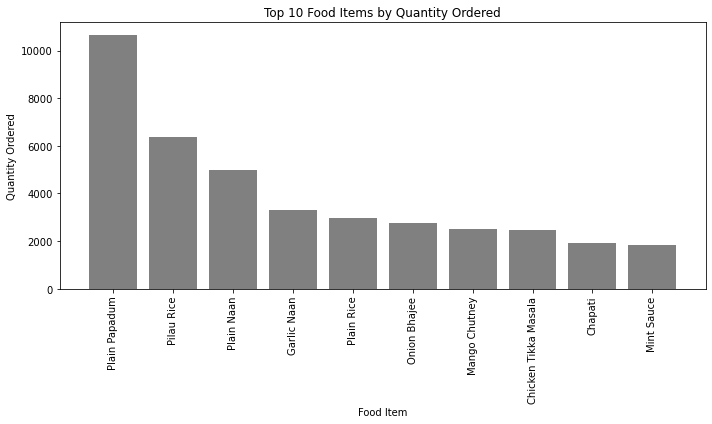

In [27]:
# Group the orders by item_name and calculate the total quantity for each item
order_summary = data.groupby('Item Name')['Quantity'].sum().reset_index()

# Sort the order_summary DataFrame by order_quantity in descending order
order_summary = order_summary.sort_values('Quantity', ascending=False)

# Select the top 10 food items with the highest quantity ordered
top_10_items = order_summary.head(10)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['Item Name'], top_10_items['Quantity'], color='Grey')
plt.xlabel('Food Item')
plt.ylabel('Quantity Ordered')
plt.title('Top 10 Food Items by Quantity Ordered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Item that was bought (appears) the most.

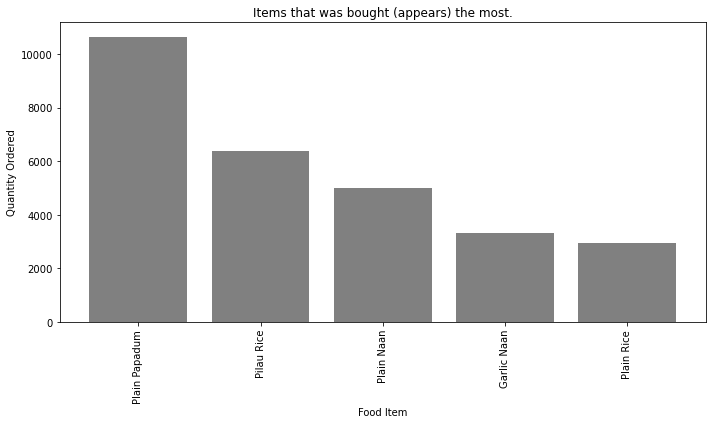

In [31]:
# Group the orders by item_name and calculate the total quantity for each item
order_summary = data.groupby('Item Name')['Quantity'].sum().reset_index()

# Sort the order_summary DataFrame by order_quantity in descending order
order_summary = order_summary.sort_values('Quantity', ascending=False)

# Select the top 10 food items with the highest quantity ordered
top_5_items = order_summary.head(5)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_5_items['Item Name'], top_5_items['Quantity'], color='Grey')
plt.xlabel('Food Item')
plt.ylabel('Quantity Ordered')
plt.title('Items that was bought (appears) the most.')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## The trends of the sales over the years

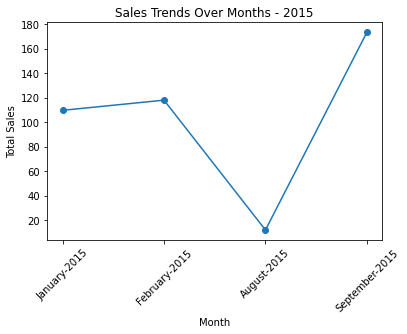

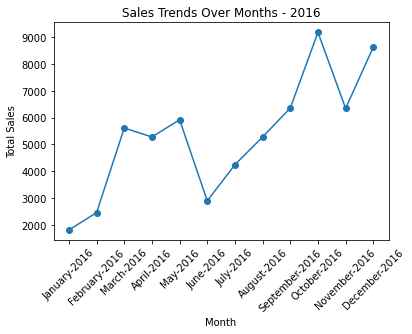

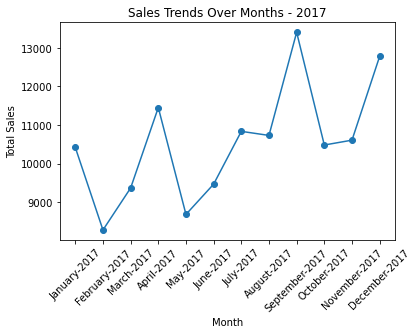

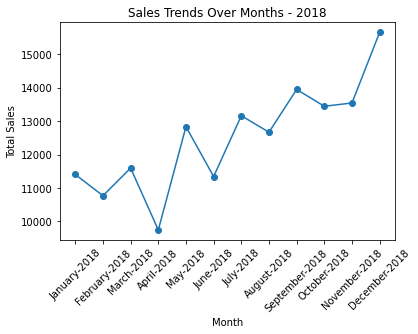

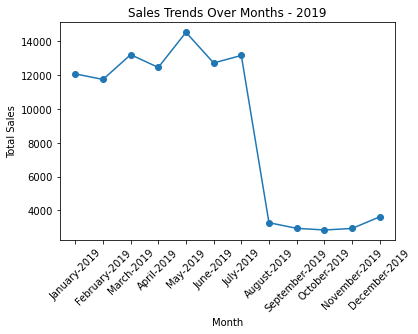

In [32]:
# Filter the data for the years 2015 to 2019
data_filtered = data[(data['Year'] >= 2015) & (data['Year'] <= 2019)]

# Group the data by year and month and calculate the total sales
monthly_sales = data_filtered.groupby(['Year', 'Month'])['Total Sales'].sum()

# Reset the index
monthly_sales = monthly_sales.reset_index()

# Create a new column 'Month Year' combining the month and year
monthly_sales['Month Year'] = monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str)

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the data by year and month using the custom order
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

# Create a separate graph for each year
years = monthly_sales['Year'].unique()

for year in years:
    # Filter the data for the current year
    year_data = monthly_sales[monthly_sales['Year'] == year]

    # Set the x-axis range and labels
    x = range(len(year_data))
    x_labels = year_data['Month Year']

    # Plot the line graph for the current year
    plt.plot(x, year_data['Total Sales'], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.title(f'Sales Trends Over Months - {year}')
    plt.xticks(x, x_labels, rotation=45)

    # Display the graph for the current year
    plt.show()

## The busiest days between the weekdays and weekends

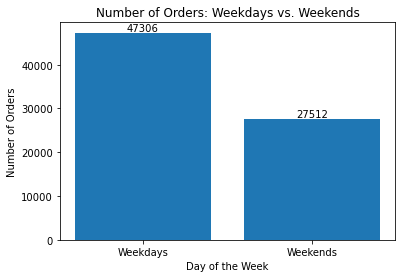

In [33]:
# Convert 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the weekday from 'Order Date' column (Monday = 0, Sunday = 6)
data['Weekday'] = data['Order Date'].dt.weekday

# Group the data by weekday and count the number of orders
orders_weekday = data[data['Weekday'] < 5].shape[0]  # Weekdays (Monday to Friday)
orders_weekend = data[data['Weekday'] >= 5].shape[0]  # Weekends (Saturday and Sunday)

# Create a bar graph to compare the number of orders on weekdays versus weekends
x_labels = ['Weekdays', 'Weekends']
orders_count = [orders_weekday, orders_weekend]

plt.bar(x_labels, orders_count)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders: Weekdays vs. Weekends')

# Display the values on top of each bar
for i, v in enumerate(orders_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the graph
plt.show()
